# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [1]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
# Create a new dataframe from your CSV
df=pd.read_csv('Rat_Sightings.csv')

In [2]:
# Print out any information you need to understand your dataframe
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101914 entries, 0 to 101913
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      101914 non-null  int64  
 1   Created Date                    101914 non-null  object 
 2   Closed Date                     90983 non-null   object 
 3   Agency                          101914 non-null  object 
 4   Agency Name                     101914 non-null  object 
 5   Complaint Type                  101914 non-null  object 
 6   Descriptor                      101914 non-null  object 
 7   Location Type                   101908 non-null  object 
 8   Incident Zip                    101578 non-null  float64
 9   Incident Address                92840 non-null   object 
 10  Street Name                     92839 non-null   object 
 11  Cross Street 1                  85257 non-null   object 
 12  Cross Street 2  

Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<Axes: >

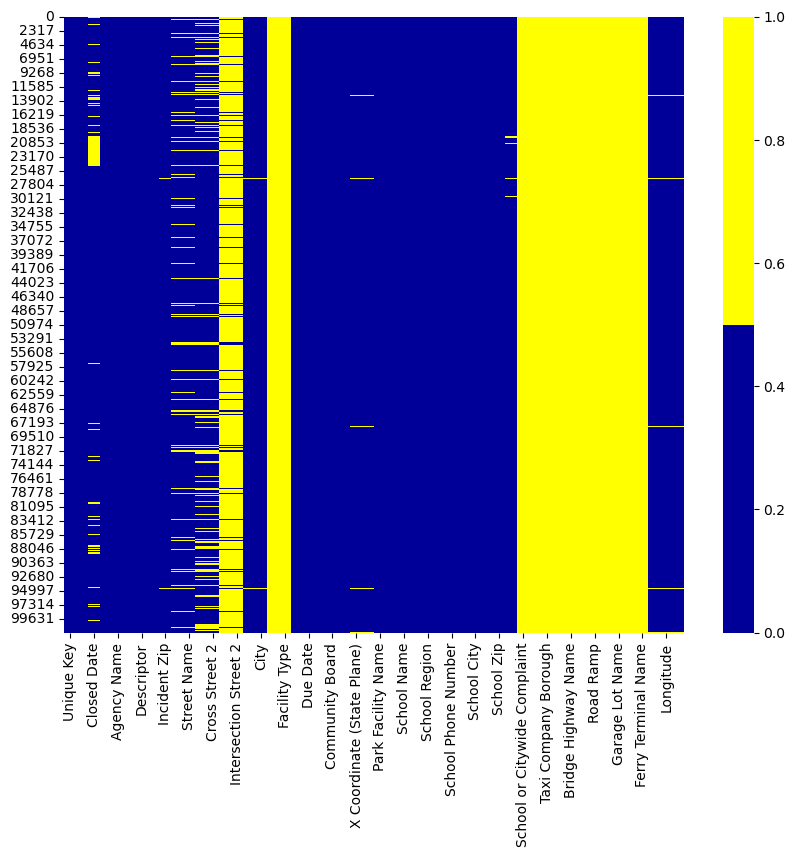

In [3]:
# Plot a heatmap of any missing data
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))


colors=['#000099', '#ffff00']
sns.heatmap(df[df.columns].isna(), cmap=sns.color_palette(colors))

In [4]:
# Try out a missing data percentage list! 
missing_pct=df.isna().mean()*100
missing_pct

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                        10.725710
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          0.000000
Location Type                       0.005887
Incident Zip                        0.329690
Incident Address                    8.903585
Street Name                         8.904567
Cross Street 1                     16.344173
Cross Street 2                     16.376553
Intersection Street 1              91.242616
Intersection Street 2              91.242616
Address Type                        0.339502
City                                0.335577
Landmark                           99.965657
Facility Type                     100.000000
Status                              0.000000
Due Date                            0.114803
Resolution Action Updated Date      0.002944
Community 

<Axes: >

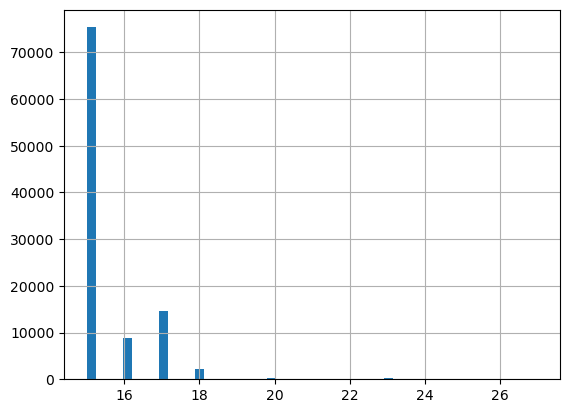

In [5]:
# Plot a missing data histogram
missing_by_row=df.isna().sum(axis=1)
missing_by_row.hist(bins=50)

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [6]:
# Handle any missing data in your dataframe.
missing_pct[missing_pct > 90]

Intersection Street 1            91.242616
Intersection Street 2            91.242616
Landmark                         99.965657
Facility Type                   100.000000
School or Citywide Complaint    100.000000
Vehicle Type                    100.000000
Taxi Company Borough            100.000000
Taxi Pick Up Location           100.000000
Bridge Highway Name             100.000000
Bridge Highway Direction        100.000000
Road Ramp                       100.000000
Bridge Highway Segment          100.000000
Garage Lot Name                 100.000000
Ferry Direction                 100.000000
Ferry Terminal Name             100.000000
dtype: float64

In [7]:
df=df.drop(columns=missing_pct[missing_pct > 90].index)
df=df[missing_by_row < 19].copy()
df.shape

(101057, 37)

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

In [8]:
# Plot a histogram to see if there are any outliers.

df.kurt(numeric_only=True)

Unique Key                    -1.037885
Incident Zip                  20.122795
X Coordinate (State Plane)     2.861718
Y Coordinate (State Plane)    -0.844608
Latitude                      -0.844156
Longitude                      2.843242
dtype: float64

<Axes: >

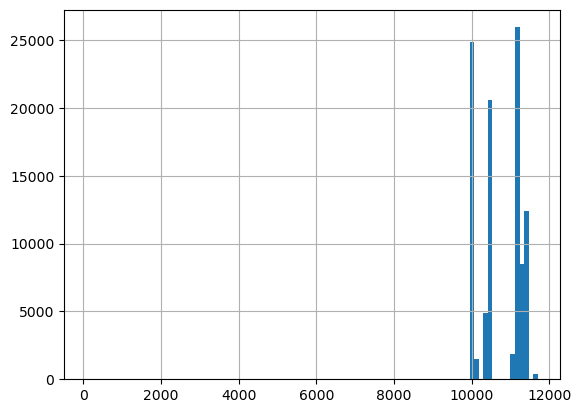

In [9]:
df['Incident Zip'].hist(bins=100)

In [10]:
# Use the describe() method
df['Incident Zip'].describe()

count    101054.000000
mean      10729.447949
std         560.093650
min          83.000000
25%       10128.000000
50%       10472.000000
75%       11222.000000
max       11694.000000
Name: Incident Zip, dtype: float64

<Axes: >

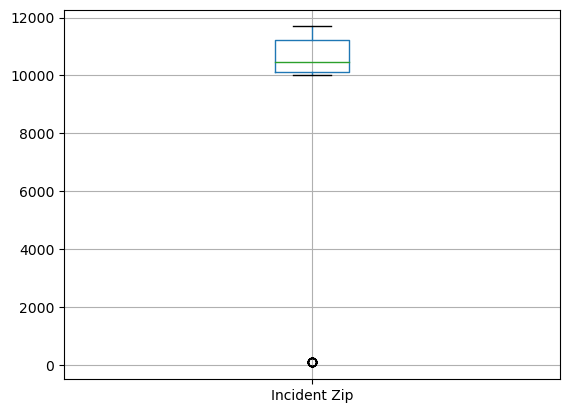

In [11]:
df.boxplot(column=['Incident Zip'])

<Axes: >

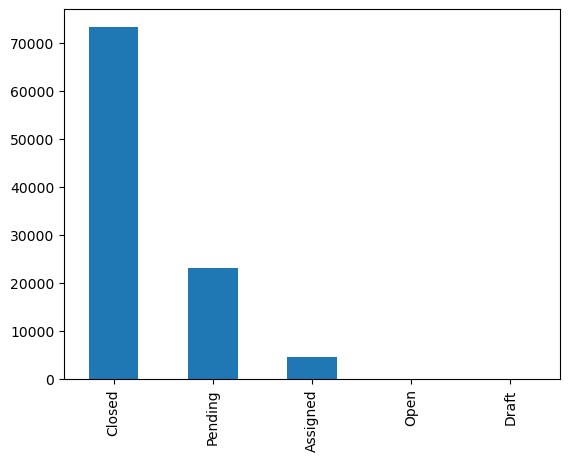

In [12]:
# Plot a bar chart
df['Status'].value_counts().plot(kind='bar')

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [13]:
# Handle any outliers in your dataframe

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [14]:
# Look for any irrelevant data in the dataframe. How will you handle it?
num_rows=len(df)
same_value_columns=[]
for col in df.columns:
    counts=df[col].value_counts(dropna=False)
    top_pct=(counts/num_rows).iloc[0]
    

    if top_pct > .999:
        same_value_columns.append(col)
        print('{0}:{1:.2f}%'.format(col, top_pct*100))
        print(counts)
        print()
print(same_value_columns)   

Agency:100.00%
DOHMH    101057
Name: Agency, dtype: int64

Agency Name:100.00%
Department of Health and Mental Hygiene    101057
Name: Agency Name, dtype: int64

Complaint Type:100.00%
Rodent    101057
Name: Complaint Type, dtype: int64

Descriptor:100.00%
Rat Sighting    101057
Name: Descriptor, dtype: int64

Park Facility Name:100.00%
Unspecified    101057
Name: Park Facility Name, dtype: int64

School Name:100.00%
Unspecified    101057
Name: School Name, dtype: int64

School Number:100.00%
Unspecified    101057
Name: School Number, dtype: int64

School Region:100.00%
Unspecified    101057
Name: School Region, dtype: int64

School Code:100.00%
Unspecified    101057
Name: School Code, dtype: int64

School Phone Number:100.00%
Unspecified    101057
Name: School Phone Number, dtype: int64

School Address:100.00%
Unspecified    101057
Name: School Address, dtype: int64

School City:100.00%
Unspecified    101057
Name: School City, dtype: int64

School State:100.00%
Unspecified    101057
N

In [15]:
df=df.drop(columns=same_value_columns)

In [16]:
df.shape

(101057, 23)

In [17]:
# Look for duplicates. How will you handle any duplicates?
df[df.duplicated()]

,Unique Key,Created Date,Closed Date,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,...,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,School Not Found,Latitude,Longitude,Location


In [18]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [19]:
# Try to convert all the strings in a column to lower or upper case.
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101057 entries, 0 to 101913
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      101057 non-null  int64  
 1   Created Date                    101057 non-null  object 
 2   Closed Date                     90260 non-null   object 
 3   Location Type                   101051 non-null  object 
 4   Incident Zip                    101054 non-null  float64
 5   Incident Address                92300 non-null   object 
 6   Street Name                     92300 non-null   object 
 7   Cross Street 1                  84659 non-null   object 
 8   Cross Street 2                  84627 non-null   object 
 9   Address Type                    101057 non-null  object 
 10  City                            101047 non-null  object 
 11  Status                          101057 non-null  object 
 12  Due Date        

In [20]:
df['Street Name'].value_counts(dropna=False)

NaN                       8757
GRAND CONCOURSE            713
BROADWAY                   699
EASTERN PARKWAY            631
LAFAYETTE AVENUE           375
                          ... 
BOWLES AVENUE                1
HOLLIS COURT BOULEVARD       1
OCONNER AVENUE               1
153 AVENUE                   1
EAST 159TH STREET            1
Name: Street Name, Length: 6617, dtype: int64

In [21]:
df['Borough'].value_counts(dropna=False)

BROOKLYN         34430
MANHATTAN        26418
BRONX            20599
QUEENS           14719
STATEN ISLAND     4891
Name: Borough, dtype: int64

In [22]:
df['Location'].value_counts(dropna=False)

(40.85394627842468, -73.86483898777793)     185
(40.658073341365935, -73.94515150328259)    127
(40.86358971566106, -73.90133057228715)      88
(40.824594531459304, -73.8772991398564)      64
(40.672614930439295, -73.9657852174561)      59
                                           ... 
(40.624621956287065, -74.00292513174044)      1
(40.698259618020835, -73.8263104786292)       1
(40.83246170884221, -73.90424596063028)       1
(40.85604481347229, -73.88952822026437)       1
(40.689959114561724, -73.91341850676221)      1
Name: Location, Length: 58018, dtype: int64

In [23]:
df['Incident Address'].value_counts(dropna=False)

NaN                     8757
2131 WALLACE AVENUE      186
95 EASTERN PARKWAY       176
651 BROOKLYN AVENUE      127
2486 DAVIDSON AVE         88
                        ... 
117 WEST 95 STREET         1
41-06 102 STREET           1
61-10 BELL BOULEVARD       1
77 HANSON PLACE            1
1117 HANCOCK STREET        1
Name: Incident Address, Length: 51383, dtype: int64

In [24]:
df['Street Name lower']=df['Street Name'].str.lower()
df['Street Name lower'].value_counts(dropna=False)

NaN                       8757
grand concourse            713
broadway                   699
eastern parkway            631
lafayette avenue           375
                          ... 
bowles avenue                1
hollis court boulevard       1
oconner avenue               1
153 avenue                   1
east 159th street            1
Name: Street Name lower, Length: 6617, dtype: int64